# Face Mask Detection

built this model to use in my [real-time-face-mask-detection mini-project using opencv](https://github.com/hikmatullah-mohammadi/real-time-face-mask-detection), so I tried to keep it simple.

## Import required libraries / dependencies

In [1]:
!pip install tensorflow tensorflow_addons --upgrade --quiet
!pip install transformers --upgrade --quiet
!yes | apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
0 upgraded, 0 newly installed, 0 to remove and 91 not upgraded.
yes: standard output: Broken pipe


In [2]:
# import required libraries / dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2022-12-12 17:28:37.395722: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 17:28:38.631959: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-12-12 17:28:38.632108: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Co

2.11.0


In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

## Generate the datasets, both the training and the test sets

In [4]:
# define the paths to the dataset.
ds_path = '/kaggle/input/face-mask-lite-dataset'

In [9]:
# Create dataset
image_size = (100, 100)
batch_size = 64

training_set = keras.preprocessing.image_dataset_from_directory(
    directory=ds_path,
    class_names=['without_mask', 'with_mask'],
    image_size=image_size,
    batch_size=batch_size,
    seed=1,
    subset='training',
    validation_split=0.2
)
test_set = keras.preprocessing.image_dataset_from_directory(
    directory=ds_path,
    class_names=['without_mask', 'with_mask'],
    image_size=image_size,
    batch_size=batch_size,
    seed=1,
    subset='validation',
    validation_split=0.2
)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


## Visualize some images from the training set

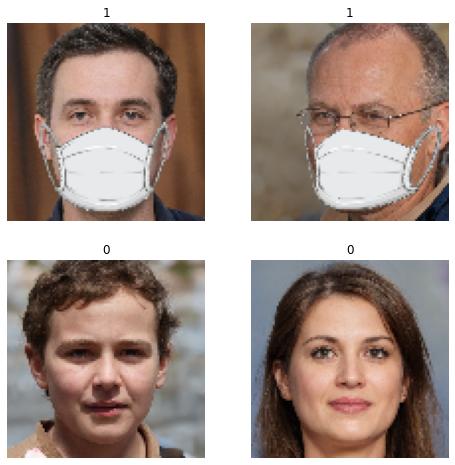

In [11]:
# visualize the training set
plt.figure(figsize=(8, 8))
    
for images, labels in training_set.take(1):
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'{int(labels[i])}')
        plt.axis('off')

----

## Build a model

In [14]:
# build the model
model = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(*image_size, 3)),
    
    # preprocessing
    layers.Rescaling(scale=1./255),
    
    # applying image data augmentation
    layers.RandomRotation(0.1),
    
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),
    
    layers.Flatten(),
    
    # output layer
    layers.Dense(1, activation='sigmoid')
])

In [15]:
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 rescaling_2 (Rescaling)     (None, 100, 100, 32)      0         
                                                                 
 random_rotation_2 (RandomRo  (None, 100, 100, 32)     0         
 tation)                                                         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 64)      

## Train the model

In [16]:
epochs = 2

# compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# fit the model
history = model.fit(training_set, validation_data=test_set, epochs=epochs, verbose=2)

Epoch 1/2


2022-12-12 17:37:37.627957: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-12-12 17:37:40.103886: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.
2022-12-12 17:37:40.245599: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:115] *** WARNING *** You are using ptxas 11.0.221, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-addr

250/250 - 696s - loss: 0.0387 - accuracy: 0.9808 - val_loss: 3.4387e-06 - val_accuracy: 1.0000 - 696s/epoch - 3s/step
Epoch 2/2
250/250 - 686s - loss: 1.8864e-05 - accuracy: 1.0000 - val_loss: 2.0188e-06 - val_accuracy: 1.0000 - 686s/epoch - 3s/step


In [17]:
# Save the model for future use
model.save('./face-mask-detection-model.h5')
print('Model saved!')

Model saved!


## Visualize the predicted images

2/2 [==============================] - 0s 4ms/step


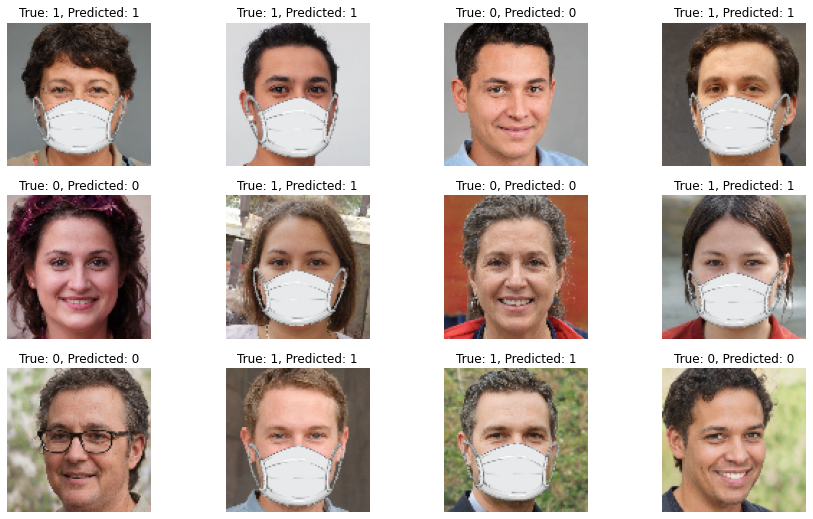

In [18]:
# visualize the predicted data
loaded_model = keras.models.load_model('face-mask-detection-model.h5')

plt.figure(figsize=(15, 9))

def predict(imgs):
    pred = []
    for i in loaded_model.predict(images.numpy().astype('uint8')):
        if i[0] > .5:
            pred.append(1)
        else:
            pred.append(0)
    return pred
    
for images, labels in test_set.take(1):
    pred = predict(images)
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f'True: {int(labels[i])}, Predicted: {pred[i]}')
        plt.axis('off')

---

<div style='border-radius:10px;background:black;color:white;padding:25px'>
    Hey,<br>
    Thanks for your time reviewing my notebook.<br>
    Please don't hesitate to leave a comment if you have anything to share about the kernel. <br>
    Also, if you have time, please review my other works <a href='https://www.kaggle.com/hikmatullahmohammadi/code' target='_blank'>here</a>.<br><br>
    Happy coding :)<br>  
    <b>I have built a mini-project by opencv(cv2) to detect face mask in real time. <a href='https://github.com/hikmatullah-mohammadi/real-time-face-mask-detection'>Here</a> is the link to its Github repository</b>
</div>